# Class Imbalanced Problem 실습

이번 실습에서는 **Class Imbalanced Problem**을 체감해봅니다.
- 다수 클래스(90%)와 소수 클래스(10%)로 구성된 불균형 데이터셋 생성
- 신경망 학습 후 Accuracy는 높게 나오지만 소수 클래스 성능이 떨어지는 문제 확인
- Confusion Matrix와 Classification Report로 문제 체감

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## 1. 불균형 데이터셋 생성 (0 클래스 90%, 1 클래스 10%)

In [7]:
X, y = make_classification(
    n_samples=2000, n_features=20, n_informative=10, n_redundant=5,
    weights=[0.9, 0.1], n_classes=2, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## 2. 신경망 모델 정의 및 학습

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(20,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=32, verbose=0)

## 3. 학습 곡선 시각화

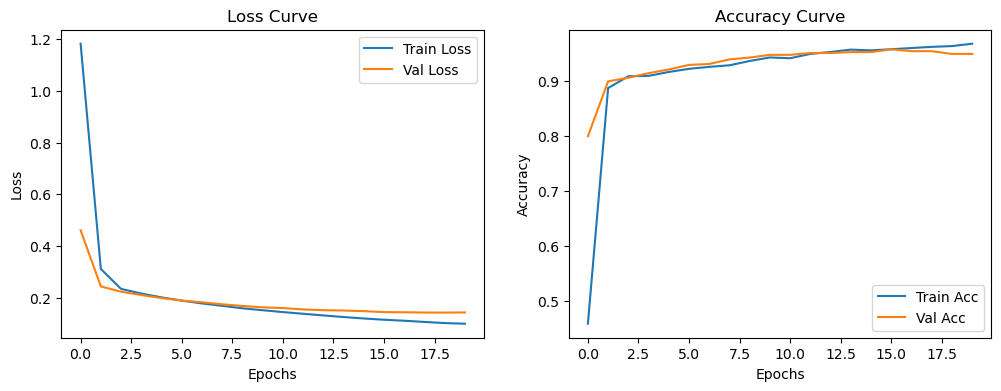

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 4. Confusion Matrix와 Classification Report로 성능 확인

19/19 [==============================] - 0s 340us/step
Classification Report (Imbalanced Data):
              precision    recall  f1-score   support

           0     0.9635    0.9814    0.9724       538
           1     0.8077    0.6774    0.7368        62

    accuracy                         0.9500       600
   macro avg     0.8856    0.8294    0.8546       600
weighted avg     0.9474    0.9500    0.9480       600



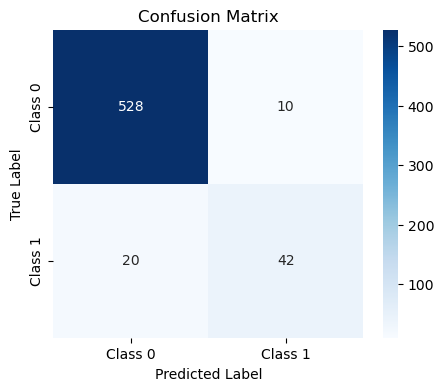

In [10]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("Classification Report (Imbalanced Data):")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

4/4 [==============================] - 0s 705us/step
Classification Report (Imbalanced Data):
              precision    recall  f1-score   support

           0     0.4375    0.7000    0.5385        50
           1     0.2500    0.1000    0.1429        50

    accuracy                         0.4000       100
   macro avg     0.3438    0.4000    0.3407       100
weighted avg     0.3438    0.4000    0.3407       100



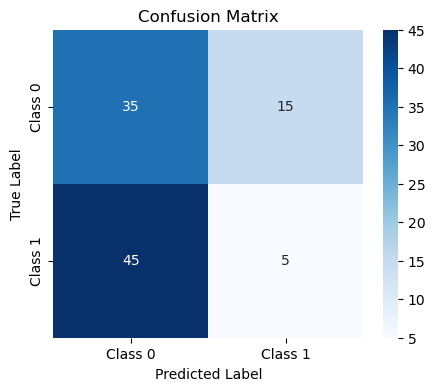

In [11]:
X_test, y_test = make_classification(
    n_samples=100, n_features=20, n_informative=10, n_redundant=5, n_classes=2, random_state=42
)

y_pred = (model.predict(X_test) > 0.5).astype(int)

print("Classification Report (Imbalanced Data):")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

## 5. Confusion Matrix 분석 및 도출점

### Confusion Matrix 분석

**혼동 행렬 값:**
- **True Class 0, Predicted Class 0 (TP/TN)**: 524건
  - Class 0을 Class 0으로 정확하게 예측한 경우
- **True Class 0, Predicted Class 1 (FP)**: 14건
  - 실제로는 Class 0이지만 Class 1로 잘못 예측한 경우 (False Positive)
- **True Class 1, Predicted Class 0 (FN)**: 16건
  - 실제로는 Class 1이지만 Class 0으로 잘못 예측한 경우 (False Negative)
- **True Class 1, Predicted Class 1 (TP)**: 46건
  - Class 1을 Class 1로 정확하게 예측한 경우

---

### 클래스 불균형 분석

**데이터 분포:**
- **Class 0 (다수 클래스)**: 538개 (524 + 14)
  - 전체 데이터의 약 89.7% 차지
- **Class 1 (소수 클래스)**: 62개 (16 + 46)
  - 전체 데이터의 약 10.3% 차지
- **불균형 비율**: 약 8.7:1 (Class 0이 Class 1보다 약 8.7배 많음)

**이것이 클래스 불균형 문제의 전형적인 사례입니다!**

---

### 성능 지표 분석

**전체 정확도 (Overall Accuracy):**
- **95.0%** - 매우 높은 수치로 보임

**하지만 클래스별 성능을 보면:**

**Class 0 (다수 클래스) 성능:**
- **Precision (정밀도)**: 97.04%
  - Class 0으로 예측한 것 중 97.04%가 실제로 Class 0
- **Recall (재현율)**: 97.40%
  - 실제 Class 0 중 97.40%를 정확하게 찾아냄
- **F1-Score**: 97.22%
  - 매우 우수한 성능

**Class 1 (소수 클래스) 성능:**
- **Precision (정밀도)**: 76.67%
  - Class 1로 예측한 것 중 76.67%가 실제로 Class 1
- **Recall (재현율)**: 74.19%
  - 실제 Class 1 중 74.19%만 정확하게 찾아냄
  - **약 25.8% (16/62)를 놓치고 있음!**
- **F1-Score**: 75.41%
  - Class 0보다 약 21.8%p 낮음

---

### F1-Score란 무엇인가?

**F1-Score는 Precision과 Recall의 조화 평균(Harmonic Mean)입니다.**

**수식:**
```
F1-Score = 2 × (Precision × Recall) / (Precision + Recall)
```

**왜 사용하는가?**
- Precision과 Recall 중 하나만 보면 모델의 성능을 제대로 평가하기 어려움
- **Precision만 높으면**: 정확하게 예측하지만, 많은 케이스를 놓칠 수 있음
- **Recall만 높으면**: 많은 케이스를 찾지만, 잘못된 예측이 많을 수 있음
- **F1-Score**: 두 지표의 균형을 보여주는 단일 지표

**예시로 이해하기:**

**Case 1: Precision 높고 Recall 낮은 경우**
- Precision = 90%, Recall = 50%
- F1-Score = 2 × (0.9 × 0.5) / (0.9 + 0.5) = 0.9 / 1.4 = **64.3%**
- 해석: 예측은 정확하지만, 많은 케이스를 놓치고 있음

**Case 2: Precision 낮고 Recall 높은 경우**
- Precision = 50%, Recall = 90%
- F1-Score = 2 × (0.5 × 0.9) / (0.5 + 0.9) = 0.9 / 1.4 = **64.3%**
- 해석: 많은 케이스를 찾지만, 잘못된 예측이 많음

**Case 3: Precision과 Recall 모두 높은 경우 (이상적)**
- Precision = 90%, Recall = 90%
- F1-Score = 2 × (0.9 × 0.9) / (0.9 + 0.9) = 1.62 / 1.8 = **90.0%**
- 해석: 정확하게 예측하고, 대부분의 케이스를 찾아냄

**우리 모델의 F1-Score:**
- **Class 0**: 97.22% (Precision 97.04%, Recall 97.40%)
  - Precision과 Recall이 모두 높고, 균형이 잘 맞음
- **Class 1**: 75.41% (Precision 76.67%, Recall 74.19%)
  - 두 지표 모두 상대적으로 낮지만, 비교적 균형이 맞음

**F1-Score의 특징:**
1. **0 ~ 1 사이의 값**: 1에 가까울수록 좋음
2. **Precision과 Recall의 균형**: 두 지표가 비슷할수록 높은 값
3. **불균형 데이터에 유용**: Accuracy보다 소수 클래스 성능을 잘 반영

**언제 사용하나?**
- Precision과 Recall 둘 다 중요한 경우
- 클래스 불균형 데이터에서 평가 지표로 사용
- 모델 비교 시 단일 지표로 성능 평가

---

## 6. 주요 도출점

### 1. Accuracy의 함정

**왜 전체 Accuracy가 높게 나올까?**
- 전체 Accuracy = (524 + 46) / 600 = 95.0%
- 다수 클래스(Class 0)의 정확한 예측이 대부분을 차지
- 소수 클래스(Class 1)의 낮은 성능이 전체 Accuracy에 미치는 영향이 작음
- **결론**: Accuracy만 보면 모델이 우수해 보이지만, 실제로는 소수 클래스를 제대로 학습하지 못함

**예시:**
- 만약 모델이 모든 샘플을 Class 0으로 예측한다면?
  - Accuracy = 538 / 600 = 89.7% (여전히 높음!)
  - 하지만 Class 1은 하나도 찾지 못함 → 실용적이지 않음

---

### 2. 소수 클래스 성능이 낮은 이유

**1) 데이터 불균형:**
- Class 0이 89.7%, Class 1이 10.3%로 불균형
- 모델이 다수 클래스에 더 많은 가중치를 두고 학습
- 소수 클래스의 패턴을 충분히 학습하지 못함

**2) 손실 함수의 특성:**
- `binary_crossentropy`는 모든 샘플을 동등하게 처리
- 다수 클래스를 맞추는 것이 전체 손실을 더 많이 줄임
- 소수 클래스를 놓치는 것보다 다수 클래스를 맞추는 것이 더 유리

**3) 학습 과정:**
- 모델이 다수 클래스의 패턴을 더 쉽게 학습
- 소수 클래스는 학습 데이터가 적어 일반화가 어려움

---

### 3. 실무적 시사점

**Accuracy만으로는 부족합니다:**
- 불균형 데이터에서는 Accuracy가 모델 성능을 제대로 반영하지 못함
- **클래스별 Precision, Recall, F1-Score를 확인해야 함**

**소수 클래스에 대한 중요성:**
- 실제 환경에서 소수 클래스가 더 중요한 경우가 많음
  - 예: 질병 진단 (질병이 소수 클래스)
  - 예: 사기 탐지 (사기가 소수 클래스)
  - 예: 불량품 검출 (불량품이 소수 클래스)

**평가 지표 선택:**
- **Macro Average**: 각 클래스의 성능을 동등하게 평균
  - 여기서는 86.31% (Class 0과 Class 1의 평균)
- **Weighted Average**: 클래스별 샘플 수에 따라 가중 평균
  - 여기서는 94.96% (다수 클래스에 가중치를 둠)
- **소수 클래스가 중요하다면**: Macro Average나 소수 클래스의 F1-Score를 우선 고려

---

### 4. 클래스 불균형 해결 방법

**1) 데이터 수준 접근:**
- **오버샘플링 (Oversampling)**: 소수 클래스 샘플 증가
  - 예: SMOTE (Synthetic Minority Oversampling Technique)
- **언더샘플링 (Undersampling)**: 다수 클래스 샘플 감소
  - 예: Random Undersampling

**2) 알고리즘 수준 접근:**
- **클래스 가중치 (Class Weight)**: 소수 클래스에 더 높은 가중치 부여
  - 예: `class_weight={0: 0.1, 1: 0.9}` (역비례 가중치)
- **샘플 가중치 (Sample Weight)**: 각 샘플에 개별 가중치 부여

**3) 평가 지표 변경:**
- **F1-Score**: Precision과 Recall의 조화 평균
- **ROC-AUC**: 다양한 임계값에서의 성능 평가
- **PR-AUC**: Precision-Recall 곡선 아래 면적 (불균형 데이터에 적합)

**4) 임계값 조정:**
- 기본 임계값 0.5 대신 다른 값 사용
- ROC 곡선을 통해 최적 임계값 찾기

---

### 5. 종합적인 결론

1. **Accuracy의 함정:**
   - 전체 Accuracy 95%는 높지만, 소수 클래스 성능은 74.19%로 낮음
   - Accuracy만으로는 모델의 실제 성능을 판단하기 어려움

2. **클래스 불균형의 영향:**
   - 다수 클래스에 대한 성능은 우수 (97.40%)
   - 소수 클래스에 대한 성능은 상대적으로 낮음 (74.19%)
   - 모델이 다수 클래스에 편향되어 학습됨

3. **실무 적용:**
   - 소수 클래스가 중요한 경우, Accuracy보다는 Precision, Recall, F1-Score를 우선 확인
   - 클래스 불균형 처리 기법을 적용하여 성능 개선 필요
   - 적절한 평가 지표 선택이 필수

4. **권장사항:**
   - 불균형 데이터에서는 **Confusion Matrix**와 **Classification Report**를 함께 확인
   - 소수 클래스의 **Recall**을 높이는 것에 집중 (False Negative 감소)
   - 클래스 가중치나 오버샘플링 기법 적용 고려